## NLTK Corpus

In [2]:
# nltk brown, inaugural
import nltk
nltk.download(['inaugural', 'brown'])

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
import nltk
nltk.download()
# 다운로드 안에 아무것도 안넣으면 선택지가 나옴 (유용)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
brown = nltk.corpus.brown

In [4]:
cdf1 = nltk.ConditionalFreqDist(
    (genre, word) #modal, genre 순서 바꾸면
    # 장르에 따른 워드의 freq
    for genre in brown.categories()
    for word in brown.words(categories = genre) # fileid도 가능하므로 변수 이름 정확히 써주기
)
genres = brown.categories()[:5]
modals = ['can', 'could', 'may', 'migt', 'will', 'would']
cdf1.tabulate(conditions = genres, samples = modals)
# conditions과 samples를 지정할 수 있음

                 can could   may  migt  will would 
     adventure    46   151     5     0    50   191 
belles_lettres   246   213   207     0   236   392 
     editorial   121    56    74     0   233   180 
       fiction    37   166     8     0    52   287 
    government   117    38   153     0   244   120 


In [5]:
# genre별로 modal의 빈도수를 가진 cfd
cfd2 = nltk.ConditionalFreqDist(
    (genre, modals) # 장르별을 보고 싶다면 (modals,genre)로 비꾸기
    for genre in brown.categories()
    for modals in ['can', 'could', 'may', 'migt', 'will', 'would'] 
    # modals를 지정해줌
    for word in brown.words(categories = genre) # modal과 brown을 연결시켜주는 고리
        if word.lower() == modals # for문에 콜론 없음
    # if 써서 word와 modal을 연결시킴
)
cfd2.tabulate()
# conditon, sample 지정 안해줘도 전체 대비 modal에 대한 condition이 나옴

                  can could   may  will would 
      adventure    48   154     7    51   194 
 belles_lettres   249   216   221   246   397 
      editorial   124    57    79   235   185 
        fiction    39   168    10    56   291 
     government   119    38   179   244   120 
        hobbies   276    59   143   269    83 
          humor    17    33     8    13    56 
        learned   367   159   336   340   321 
           lore   170   142   170   178   188 
        mystery    45   145    15    25   189 
           news    94    87    93   389   246 
       religion    84    59    79    72    69 
        reviews    45    40    47    61    48 
        romance    79   195    11    49   247 
science_fiction    16    49     4    17    80 


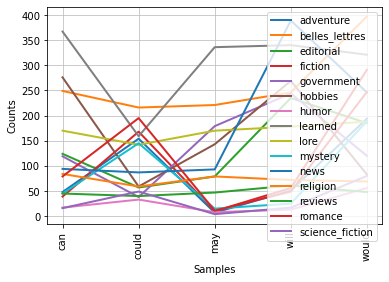

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
cfd2.plot()
# x축은 modal y축은 counts

In [8]:
#import matplotlip.pyplot as plt
#plt.figure(figsize = (12,5))
#cfd2.plot()

### inaugural
- 연설문 데이터

In [9]:
inaugural = nltk.corpus.inaugural

In [10]:
inaugural.fileids()[:10]
# 연도-이름.txt
# inaugural은 fileids만 있음

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt']

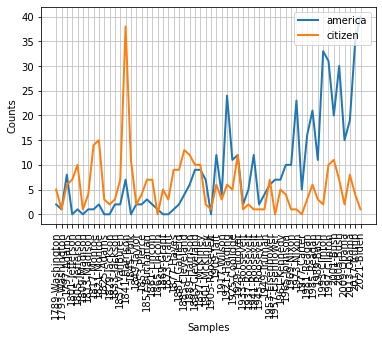

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
# inaugural에서 america, citizen의 빈도수, 연도별로
# fileid에서 .txt빼기
cfd = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4])#.txt빼기
    #  (fileid[:-4],target_word)x,y축 바뀐다. 해도됨
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileids = fileid)
        if word.lower().startswith(target_word)
    # target_word기 fileid안에 있는지!
)
cfd.plot()

In [12]:
cfd1 = nltk.ConditionalFreqDist(
    (fileid[:-4],target_word)
    # x,y축이 바뀜
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileids = fileid)
        if word.lower().startswith(target_word)
)
cfd.tabulate()

        1789-Washington 1793-Washington      1797-Adams  1801-Jefferson  1805-Jefferson    1809-Madison    1813-Madison     1817-Monroe     1821-Monroe      1825-Adams    1829-Jackson    1833-Jackson   1837-VanBuren   1841-Harrison       1845-Polk     1849-Taylor     1853-Pierce   1857-Buchanan    1861-Lincoln    1865-Lincoln      1869-Grant      1873-Grant      1877-Hayes   1881-Garfield  1885-Cleveland   1889-Harrison  1893-Cleveland   1897-McKinley   1901-McKinley  1905-Roosevelt       1909-Taft     1917-Wilson    1921-Harding   1925-Coolidge     1929-Hoover  1933-Roosevelt  1937-Roosevelt  1941-Roosevelt  1945-Roosevelt     1949-Truman 1953-Eisenhower 1957-Eisenhower    1961-Kennedy    1965-Johnson      1969-Nixon      1973-Nixon     1977-Carter     1981-Reagan     1985-Reagan       1989-Bush    1993-Clinton    1997-Clinton       2001-Bush       2005-Bush      2009-Obama      2013-Obama      2017-Trump      2021-Biden 
america               2               1               8        

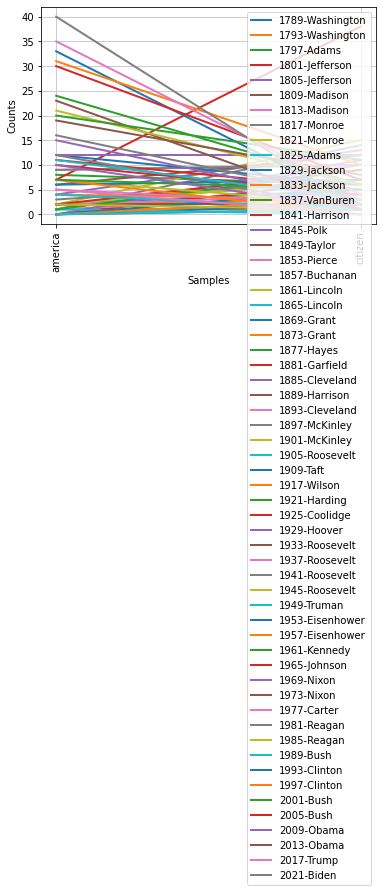

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
cfd1.plot()

## Tuple & List

1. 생성하기

In [17]:
emptyT =()
emptyT =tuple()

emptyL =[]
emptyL =list()

emptyT,emptyL

((), [])

1.1.  요소가 2개 이상일 때

In [18]:
listA =['a', 'b']
tupleA = 'a', 'b' # 많이 씀
tupleA = ('a', 'b')
listA, tupleA 

(['a', 'b'], ('a', 'b'))

1.2. 요소사 1개일 때

In [19]:
listA = ['a']
tupleA=('a',) # comma 안붙이면 string이 됨
tupleA ='a',
listA, tupleA

(['a'], ('a',))

In [20]:
ex = ('a')
type(ex)

str

2. 여러 변수 할당하기
- packing: 한 변수에 여러 개의 데이터를 할당하는 것
    - 리스트, 튜플 자체가 a=[1,2,3,4]
- unpacking: 여러 변수에 하나의 데이터를 할당하는 것, 그것을 각각의 변수로 변환하는 것
    - a, b, c =[1,2,3]

In [21]:
name = 'lee'
a, b, c = name
a, b, c
# 튜플로 나옴
# unpacking

('l', 'e', 'e')

In [22]:
# 값 교환
pwd = 'abcd'
userId = 'hello'

# pwd = 'hello', userId = 'abcd'
temp1 = pwd
temp2 = userId
pwd = temp2
userId = temp1

pwd, userId = userId, pwd
# 중간에 거쳐가는 단계가 없음
pwd, userId

('abcd', 'hello')

3. 연산
- 리스트도 동일함

In [23]:
('a',) + ('b', 'c')

('a', 'b', 'c')

In [24]:
('a', 'b') * 4

('a', 'b', 'a', 'b', 'a', 'b', 'a', 'b')

In [25]:
a = 1, 2
b =1, 3

a<b # True 나옴
# a와 b는 튜플임
# 비교할 때는 첫 번째 요소부터!
a,b

((1, 2), (1, 3))

4. 순회하기

In [28]:
a = 1,2,3,4,5
for i in a:
        print(i) # 튜플도 리스트처럼 순회가능

1
2
3
4
5


5. listcomprehension
- tuple?(x)

In [34]:
# [word for word in text] -> 튜플은 안됨

In [29]:
# 1.
tuple([word for word in a])

#2. 느림
*[word for word in a],
# 리스트 컴프리핸션이 가장 빠름

(1, 2, 3, 4, 5)

6. 튜플은 불변 객체이다.
- a = 1,2,3,4
- a =1,2 이렇게 바꾸지 않는 한 추가로 넣을 수 없다
- 코드를 수정할 때 이 튜플을 수정할 수 없게 하는 용도로 사용함.
- key 값을 저장할 때 쓴다
"""
blue = 1
white = 2
코드저장할 때 많이 사용
"""
- 메모리 사용이 적다.

In [30]:
(1,) + (1,2,3)

(1, 1, 2, 3)

In [31]:
a = (1,)
b = (1,2,3)
a + b

(1, 1, 2, 3)

In [33]:
a =(1,)
b = (1,2,3)
id(a), id(a+b)
# 수정 안됨
# id는 다름
# 다른 것에 할당한 것임
# 문자열과 같이 튜플을 결합하여 새 튜플을 만들 수 있음

(2885567481648, 2885544814528)

7. 형 변환
- tuple()
- ()

In [34]:
tuple('cat'), ['cat']
# 둘이 다름 
# 각각의 요소를 하나씩 띄어서 순회, 하나의 리스트

(('c', 'a', 't'), ['cat'])

In [35]:
list('cat'), ['cat']
# 리스트에서도 다른 것임 (주의)

(['c', 'a', 't'], ['cat'])

In [36]:
b[0]
# 슬라이싱 접근 똑같다

1

- 튜플의 장점:
     - 타인이 변경하는 걸 막을 수 있다.(차이점)
     - 메모리 사용이 적다.
- 리스트 장점:
    - 데이터 순차적으로 파악하기 좋다.
    - 중복되는 데이터를 포함하라 수 있다.

list 관련함수

1. 항목 변경하기

In [50]:
days = ['월', '화', '수', '목']
# 'fri' 추가하기
days.append('fri')
# 마지막에 요소 추가

In [51]:
days

['월', '화', '수', '목', 'fri']

In [52]:
days.insert(2, 'Sat')
# 원하는 오프셋을 지정할 수 있다.

In [53]:
days

['월', '화', 'Sat', '수', '목', 'fri']

In [54]:
# 병합하기(리스트와 리스트 합치기)
days.extend(['토','일'])

In [55]:
days

['월', '화', 'Sat', '수', '목', 'fri', '토', '일']

In [56]:
listA = ['토', '일']
days.extend(listA)
days

['월', '화', 'Sat', '수', '목', 'fri', '토', '일', '토', '일']

In [57]:
listA = ['토', '일']
days.append(listA)
days
# append는 리스트 자체가 하나로 들어감

['월', '화', 'Sat', '수', '목', 'fri', '토', '일', '토', '일', ['토', '일']]

In [58]:
# offset으로 접근하기
days[-3] = '공휴일'

In [59]:
days

['월', '화', 'Sat', '수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [60]:
# offset
days[:3] = 1,2,3
# 갯수가 안맞아도 됨

In [61]:
days

[1, 2, 3, '수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [62]:
days[:3] = 'cat'
days
# str은 하나씩 순회를 한다

['c', 'a', 't', '수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [63]:
# a= 1,2,3,4,5
a = list(range(1,6))

In [64]:
a

[1, 2, 3, 4, 5]

삭제하기

In [65]:
#1. offset 이용
del days[0]

In [66]:
days
# 지워지면서 자리가 보존 되지 않고 앞당겨진다

['a', 't', '수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [67]:
#2. 특정한 값 삭제
days.remove('a')
days

['t', '수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [68]:
days.remove('토')
days

['t', '수', '목', 'fri', '일', '공휴일', '일', ['토', '일']]

In [69]:
# 3. pop(index) dafault = -1 맨 마지막 요소 삭제
days.pop()
# 삭제된거 보여줌

['토', '일']

In [70]:
days.pop(0)

't'

In [71]:
# clear - 다 삭제하고 싶을 때
days.clear()

In [72]:
days

[]

### 값 찾기

In [73]:
a = list(range(5))
a.index(2)

2

In [74]:
# 값 확인 - 3이 있냐? 
3 in a

True

### 정렬하기
- sort(revere 가능): 정렬한 뒤 값 반환하지 않고 기존값 변경하여 있음.
- sorted(리스트, reverse 가능): 정렬힌 복사분을 반환, 기존 값은 유지.
- 리스트.reverse(): 거꾸로 출력
- list(reversed(리스트))

In [88]:
a

[0, 1, 2, 3, 4]

In [75]:
b = sorted(a, reverse = True)
# 같은거엔 할당이 안됨

In [76]:
a,b

([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

In [77]:
b.sort()

In [78]:
b

[0, 1, 2, 3, 4]

In [79]:
b.reverse()

In [80]:
b

[4, 3, 2, 1, 0]

In [81]:
c = list(reversed(b))
# 리스트로 감싸줘야함
c

[0, 1, 2, 3, 4]

### 할당하기
- =으로 할당할 때에는 하나의 값이 변하면 같이 변함, 메모리 주소를 참조하고 있으므로
- shallow copy
    - a가 변해도 b가 변하지 않게 하는 복사
    - 리스트.copy()
    - list(리스트)
    - 리스트[:]
- deep copy
    - 하위에 중첩된 리스트(2차원 리스트) 요소가 바뀌는 것을 방지
- 얕은 복사 (shallow copy)와 깊은 복사 (deep copy)

In [81]:
a

[0, 1, 2, 3, 4]

In [82]:
b = a 
b[0] = 7
a
# [0, 1, 2, 3, 4]에 a,b가 주소를 참조함
# a도 바뀜

[7, 1, 2, 3, 4]

In [83]:
b

[7, 1, 2, 3, 4]

In [84]:
id(a), id(b)
# id 같음

(2885569755584, 2885569755584)

In [85]:
# shallow copy
b = a.copy()
c = list(a)
d = a[:]
id(a), id(b), id(c), id(d)
# 다 다름 - 하나를 바꿔도 안 바뀜

(2885569755584, 2885569737280, 2885569739264, 2885569677504)

In [86]:
a.append([6,7,8])
a

[7, 1, 2, 3, 4, [6, 7, 8]]

In [87]:
e = a.copy()
e

[7, 1, 2, 3, 4, [6, 7, 8]]

In [88]:
a[-1][0] = 0
# 6을 바꿈
# 가변개체는 바뀐다(중첩된 리스트)
a, e
# deepcopy는 이걸 방지해줌

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 8]])

In [90]:
import copy 
f= copy.deepcopy(a)
f
# import로 불러와ㅏ주어야 한다

[7, 1, 2, 3, 4, [0, 7, 8]]

In [91]:
f[-1][-1] =9
a, f
# 2차원 리스트
# a는 안변했고 f는 변했다

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 9]])

### 순회하기
- zip(): 여러 개 리스트 동시 순회
- enumerate(): 인덱스도 함께 돌고자 할 때 (list, range)
- range():


In [92]:
a = [1,2,3]
b = ['mon', 'tue', 'wed', 'thu']
for itemA, itemB in zip(a,b): # 아이템 수가 적은 시퀀스에서 완료됨
    print((itemA, itemB))

(1, 'mon')
(2, 'tue')
(3, 'wed')


In [93]:
list(zip(a,b))

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [94]:
dict(zip(a,b))

{1: 'mon', 2: 'tue', 3: 'wed'}

In [95]:
for idx, itemA in enumerate(b):
    print((idx, itemA))

(0, 'mon')
(1, 'tue')
(2, 'wed')
(3, 'thu')


### 리스트 컴프리핸션

In [96]:
[day for day in b]

['mon', 'tue', 'wed', 'thu']

In [97]:
ex=[(nal,day) for nal,day in zip(a,b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [99]:
a = [1,2,3]
b = ['mon', 'tue', 'wed', 'thu']
for i in a:
    for j in b:
        [day for day in b]

### 연습
- 리스트 -> for문으로
- for문을 사용하여 ex를 구현하기
    - a,b

In [100]:
result = []
for nal, day in zip(a,b):
    result.append((nal,day)) # 요소가 하나가 들어가야되는데 두 개가 들어가서 묶어주기
result
# range 보다 zip 쓰기

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [101]:
[(nal, day) for nal in a for day in b]
# for day in b
    # for nal in a
# nal, day따로 선언 for문 2번 돌음

[(1, 'mon'),
 (1, 'tue'),
 (1, 'wed'),
 (1, 'thu'),
 (2, 'mon'),
 (2, 'tue'),
 (2, 'wed'),
 (2, 'thu'),
 (3, 'mon'),
 (3, 'tue'),
 (3, 'wed'),
 (3, 'thu')]

In [102]:
# 문제1
sentence = "don't judge a book its cover"
# [(대문자, 타이틀, 글자수), ]를 저장된 리스트로 만들어라.
# [('DON\'T', 'Don\'t',3), (...)]

In [103]:
# 문제2
text = [
    ['hello', 'guys'],
    ['how','are','you']
]
#2.1. 문장으로 구성된 리스트로 만들기
    # ['hello guys', 'how are you']
#2.2. 전체 단어를 하나의 리스트로 가져오기
    # ['','','','','']
#2.3. 전체를 스트링으로 가져오기
    # 'hello guys how are you'

In [105]:
aa=[]
sentence = "don't judge a book its cover"
# (대문자, 타이틀, 글자수) 로 저장된 리스트오 만들어라
up = sentence.upper()
lo = sentence.title()
cou = len(sentence)
aa.append((up,lo,cou))
print(aa)
# 문제 잘못 이해

[("DON'T JUDGE A BOOK ITS COVER", "Don'T Judge A Book Its Cover", 28)]


In [106]:
# 문제1 답
[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[("DON'T", "Don'T", 5),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [107]:
# 문제2.1 답- 리스트 컴프리핸션 사용
text = [
    ['hello', 'guys'],
    ['how', 'are', 'you']
]
[' '.join(word) for word in text]


['hello guys', 'how are you']

In [128]:
#1.
[' '.join(sent) for sent in text]

['hello guys', 'how are you']

In [123]:
for sent in text:
    for word in sent:
        print(word)

hello
guys
how
are
you


In [129]:
#2.
[word for sent in text for word in sent]

['hello', 'guys', 'how', 'are', 'you']

In [131]:
#3.
' '.join([word for sent in text for word in sent])

'hello guys how are you'

In [126]:
# 과제 brown.raw(categories = 'romance')[:5000]

브라운 코퍼스에서 romance 경로 raw 앞에서 5000개 선택
- 문장 분절 있는 토큰 리스트로 만들기
- 리스트컴프리핸션 for문 사용해서 불필요한 것들 제거하기
    - 문장부호도 모두 제거